In [37]:
import pandas as pd
import requests
import datetime

In [38]:
hoy = datetime.datetime.today().strftime("%Y-%m-%d")
hoy

'2023-03-15'

In [39]:
data_json = requests.get("https://mercados.ambito.com//dolar/mayorista/grafico/2021-01-01/"+hoy).json()

In [40]:
data_json=data_json[1:] # se saca primer renglon

In [41]:
data = pd.DataFrame(data_json, columns=["Fecha", "TC"]) #se pasa a DF
data = data.drop_duplicates(subset="Fecha", keep="last")

In [42]:
data["Fecha"] = pd.to_datetime(data['Fecha'], format="%d/%m/%Y")
data = data.sort_values("Fecha")
data["TC Anterior"] = data["TC"].shift(1)
data["Fecha Anterior"] = data["Fecha"].shift(1)
data = data.dropna()
data["Dif. Porc"] = (data["TC"] / data["TC Anterior"]) - 1

In [43]:
data["Días"] =( data["Fecha"] - data["Fecha Anterior"]).dt.days
data["TNA"] = data["Dif. Porc"] / data["Días"] * 365 * 100
data["Promedio 5 ds."] = data["TNA"].rolling(5).mean()

<Axes: title={'center': 'Devaluación Histórica Dólar Ofical'}, xlabel='Fecha'>

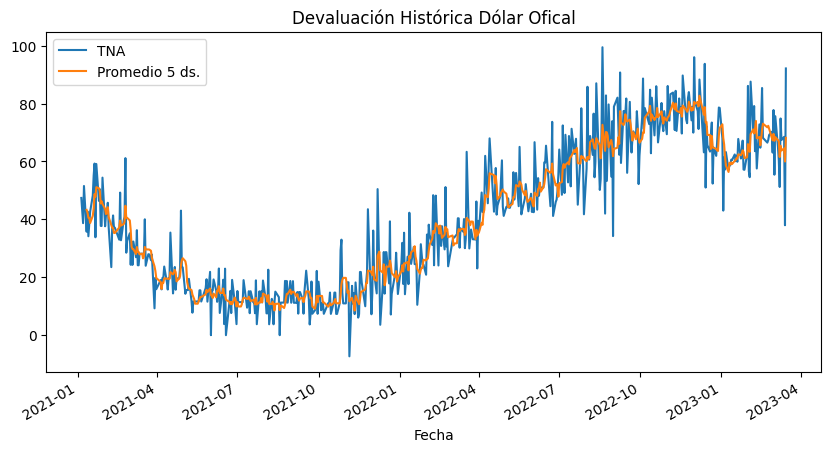

In [44]:
data.plot(x="Fecha", y=["TNA", "Promedio 5 ds."], figsize=(10,5), legend=True, title="Devaluación Histórica Dólar Ofical")


In [45]:
data["Fecha"].max()

Timestamp('2023-03-15 00:00:00')

In [46]:
data.tail(10)

,Fecha,TC,TC Anterior,Fecha Anterior,Dif. Porc,Días,TNA,Promedio 5 ds.
640,2023-03-02,197.87,197.57,2023-03-01,0.001518,1,55.423394,67.128587
641,2023-03-03,198.28,197.87,2023-03-02,0.002072,1,75.630464,68.425383
642,2023-03-06,199.34,198.28,2023-03-03,0.005346,3,65.042701,67.382070
643,2023-03-07,199.67,199.34,2023-03-06,0.001655,1,60.424401,66.855802
644,2023-03-08,199.95,199.67,2023-03-07,0.001402,1,51.184454,61.541083
645,2023-03-09,200.36,199.95,2023-03-08,0.002051,1,74.843711,65.425146
646,2023-03-10,200.73,200.36,2023-03-09,0.001847,1,67.403673,63.779788
647,2023-03-13,201.86,200.73,2023-03-10,0.005629,3,68.491672,64.469582
648,2023-03-14,202.07,201.86,2023-03-13,0.001040,1,37.971862,59.979074
649,2023-03-15,202.58,202.07,2023-03-14,0.002524,1,92.121542,68.166492
